#### For this Assignment you have been given a data which is a subset of a bigger dataset which was collected by Buffalo Tax department. It contains information regarding the various properties in Buffalo.

Number of Instances: 92508

Number of Attributes: 16 (including the target variable)

Attribute Information:

| Column Name                | Description                                                                                                                                      | Type        |
|----------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|-------------|
| TOTAL VALUE                | The combined assessed value of the land and improvements on the parcel                                                                           | Number      |
| FRONT                      | The width of the front of property (in feet)                                                                                                     | Number      |
| DEPTH                      | The depth of the property (in feet)                                                                                                              | Number      |
| PROPERTY CLASS             | Property Type Classification Codes describe the primary use of each parcel of real property on the assessment roll                               | Number      |
| LAND VALUE                 | The assessed value of the land                                                                                                                   | Number      |
| SALE PRICE                 | The price that the parcel of real property was last sold for                                                                                     | Number      |
| YEAR BUILT                 | The year the primary building on the parcel was built                                                                                            | Number      |
| TOTAL LIVING AREA          | The amount of living space (in square feet)                                                                                                      | Number      |
| OVERALL CONDITION          | A grade of the condition of the property                                                                                                         | Number      |
| BUILDING STYLE             | A code for the style of building                                                                                                                 | Number      |
| HEAT TYPE                  | The type of heating system in the building (only applicable to residential properties)                                                           | Number      |
| BASEMENT TYPE              | The type of basement on the property (only applicable to residential properties)                                                                 | Number      |
| # OF STORIES               | The number of floors/Stories in the property                                                                                                     | Number      |
| # OF FIREPLACES            | The number of fireplaces in a dwelling (only applicable to residential properties)                                                               | Number      |
| # OF BEDS                  | The number of beds in a dwelling (only applicable to residential properties)                                                                     | Number      |
| # OF BATHS                 | The number of baths in a dwelling (only applicable to residential properties)                                                                    | Number      |
| # OF KITCHENS              | The number of kitchens in a dwelling (only applicable to residential properties)                                                                 | Number      |



There are no missing Attribute Values.

Your task is to implement a Linear Regression Model to predict the TOTAL VALUE of a property

In [596]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline

#### STEP 1 - Load Data (Already Done)

In [597]:
df = pd.read_csv('data.csv', dtype=np.float64)

In [598]:
y = np.asarray(df['TOTAL VALUE'] )
y = y.reshape(y.shape[0],1)
feature_cols = df.columns.to_list()
feature_cols.remove('TOTAL VALUE')
x = np.asarray(df[feature_cols])
print(x.shape)

(92508, 15)


Variable **y** contains the total values of the property

Variable **x** contains the features

#### STEP 2 - Split the Data into training and testing and validation split ( 70% Training, 20% Testing and 10% validation) ( Hint: you can use the sklearn library for this step only) ( 5 Points)

In [599]:
#STEP 2
x_train_val,x_test,y_train_val,y_test = train_test_split(x,y,train_size=0.8)
x_train,x_val,y_train,y_val = train_test_split(x,y,train_size=0.875)

#### STEP 3 - Scale Data Using Min Max Scaler (10 Points)
For each feature scaled value can be calculated using $  x_{scaled} = \frac{x - min(x)}{max(x) - min(x)}$


In [600]:
#STEP 3
x_scaled = np.zeros(x.shape)
#min_arr = np.zeros(x.shape[1])
#scale_factor = np.zeros(x.shape[1])

for col in range(x.shape[1]):
    min_arr = min(x[:,col])
    scale_factor = 1/(max(x[:,col])-min(x[:,col]))
    x_scaled[:,col] = (x[:,col] - min_arr)*scale_factor 
        
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, train_size=0.8)
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, train_size=0.875)

#### STEP 4 - Initialize values for the weights, No. of Epochs and Learning Rate (5 Points)

In [604]:
#STEP 4
w0 = 0
w1 = np.random.rand(15)#np.zeros(15)
epoch_number = 100
nu = 0.00001

#### STEP 5 - Train Linear Regression Model (40 Points)
 5.1 Start a Loop For each Epoch
 
 5.2 Find the predicted value using $ y(x,w) = w_0 + w_1x $ for the training and validation splits (10 Points)
 
 5.3 Find the Loss using Mean Squared Error for the training and validation splits and store in a list (10 Points)
 
 5.4 Calculate the Gradients (15 Points)
 
 5.5 Update the weights using the gradients (5 Points)

In [605]:
# STEP 5

mse = []
mse_val_arr = []

for epoch in range(epoch_number):
    ssd = 0
    ddw1 = 0
    ddw0 = 0
    N = x_train.shape[0]
    ssd_val = 0
    N_val = x_val.shape[0]
    
#Validation Predicted Value
    y_pred_val = w0+np.sum(np.multiply(w1,x_val),axis=1,keepdims=True)

#Validation Mean Squared Error
    ssd_val = np.sum((y_train-y_pred)**2)
    mse_val = (1/N_val)*ssd_val #mean squared error
    

#Training Predicted Value    
    y_pred = w0+np.sum(np.multiply(w1,x_train),axis=1,keepdims=True)

#Training Gradients
    ddw1 = (-2/N)*np.sum(x_train*(y_train-y_pred),axis=0) #partial derivative wrt w1
    ddw0 = (-2/N)*np.sum((y_train-y_pred)) #partial derivative wrt w0
    
#Training MSE
    ssd = np.sum((y_train-y_pred)**2)
    mse_train = (1/N)*ssd #mean squared error
    
#Updating Weights
    w1 = w1 - [nu*weight for weight in ddw1]
    w0 = w0 - (nu*ddw0)

#Storing MSE for Train and Validation in a List
    mse.append(mse_train)
    mse_val_arr.append(mse_val)


#### STEP 6 - Evaluate the Model ( 25 Points)
6.1 Plot a graph of the Training and Validation Loss wrt epochs (10 Points)

6.2 Find the R2 Score of the trained model for the Train, Test and Validation splits (15 Points)

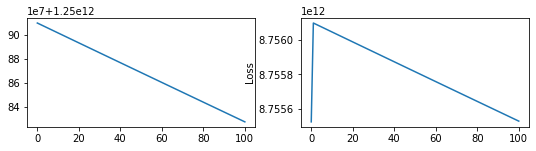

R2 for Training Set:  0.9999844075049568
R2 for Validation Set:  0.9990040578899442
R2 Test Set:  0.9997131151317707 

Since calculated R2 values do not seem correct, the values using sklearn are also shown: 
R2 Train Set w/ sklearn:  -182.84324625037297
R2 Validation Set w/ sklearn:  -4.595195382219029
R2 Test Set w/ sklearn:  -4.307943831978193


In [606]:
# STEP 6
epoch_count = np.linspace(0,epoch_number,num=epoch_number)
plt.figure(figsize=(9, 2))
plt.subplot(121)
plt.plot(epoch_count,mse,label='Training')
plt.subplot(122)
plt.plot(epoch_count,mse_val_arr,label='Validation')
plt.ylabel('Loss')
plt.legend
plt.show()


final_prediction = np.zeros(y_test.shape)
for row in range(final_prediction.shape[0]):
    final_prediction[row] = w0+np.sum(np.multiply(x_test,w1))
    
final_prediction_train = np.zeros(y_train.shape)
for row in range(final_prediction_train.shape[0]):
    final_prediction_train[row] = w0+np.sum(np.multiply(x_train,w1))
    
final_prediction_val = np.zeros(y_val.shape)
for row in range(final_prediction_val.shape[0]):
    final_prediction_val[row] = w0+np.sum(np.multiply(x_val,w1))

train_mean = np.mean(y_train)
sst_train = np.sum((y_train-train_mean)**2)
r2_train = 1-(mse[-1]/sst_train)
print('R2 for Training Set: ',r2_train)


val_mean = np.mean(y_val)
sst_val = np.sum((y_val-val_mean)**2)
r2_val = 1-(mse_val_arr[-1]/sst_val)
print('R2 for Validation Set: ',r2_val)


test_mean = np.mean(y_test)
sst_test = np.sum((y_test-test_mean)**2)
ssd_test = np.sum((y_test-final_prediction)**2)
mse_test = (1/y_test.shape[0])*ssd_test
r2_test = 1-(mse_test/sst_test)#
print('R2 Test Set: ',r2_test,'\n')

print('Since calculated R2 values do not seem correct, the values using sklearn are also shown: ')
print('R2 Train Set w/ sklearn: ', sklearn.metrics.r2_score(y_train, final_prediction_train))
print('R2 Validation Set w/ sklearn: ',sklearn.metrics.r2_score(y_val, final_prediction_val))
print('R2 Test Set w/ sklearn: ',sklearn.metrics.r2_score(y_test, final_prediction))
